## Plate_4042 Red Spectra Analysis

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

In [2]:
import bossdata
print(bossdata.__version__)

0.3.1


In [51]:
import bossdata.path
import bossdata.remote
import bossdata.meta 
import bossdata.spec as spec
import bossdata.plate as plate

In [4]:
import astropy.io.fits as fits
from astropy.table import Table

In [5]:
import fitsio
from fitsio import FITS, FITSHDR

In [6]:
from operator import and_

In [7]:
import os
workdir = os.environ['SCRATCH']
os.environ["BOSS_DATA_URL"] = 'http://dr12.sdss3.org'
os.environ["BOSS_LOCAL_ROOT"] = os.path.join(workdir,'sdss')
os.environ["BOSS_SAS_PATH"] = '/sas/dr12/boss'
os.environ["BOSS_REDUX_VERSION"]='v5_7_0'

In [8]:
os.chdir(workdir)
os.getcwd()

'/scratch/kunjias'

In [9]:
finder = bossdata.path.Finder()
mirror = bossdata.remote.Manager()

### PlateFile

The PlugMap which contains Object type information is accessed through the Plate File to obtain the sky fiber ID data.

In [10]:
plate_file_path = finder.get_plate_spec_path(plate=4042,mjd=55626)

In [11]:
plate_file_path

'/sas/dr12/boss/spectro/redux/v5_7_0/4042/spPlate-4042-55626.fits'

In [12]:
plate_file = mirror.get(plate_file_path, progress_min_size=2,auto_download=True, local_paths=None)

In [13]:
plate_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/4042/spPlate-4042-55626.fits'

In [14]:
plate = plate.PlateFile(plate_file)

In [15]:
type(plate)

bossdata.plate.PlateFile

In [16]:
plug_map = plate.plug_map

In [17]:
type(plug_map)

astropy.table.table.Table

In [18]:
plug_map.columns

<TableColumns names=('OBJID','HOLETYPE','RA','DEC','MAG','STARL','EXPL','DEVAUCL','OBJTYPE','XFOCAL','YFOCAL','SPECTROGRAPHID','FIBERID','THROUGHPUT','PRIMTARGET','SECTARGET','OFFSETID','SCI_EXPTIME','SOURCETYPE','LAMBDA_EFF','ZOFFSET','BLUEFIBER','BOSS_TARGET1','BOSS_TARGET2','ANCILLARY_TARGET1','ANCILLARY_TARGET2','RUN','RERUN','CAMCOL','FIELD','ID','CALIBFLUX','CALIBFLUX_IVAR','CALIB_STATUS','SFD_EBV')>

In [19]:
#plug_map

In [20]:
plug_map_by_OBJTYPE = plug_map.group_by('OBJTYPE')

In [21]:
print (plug_map_by_OBJTYPE)

 OBJID [5]  HOLETYPE         RA         ... CALIB_STATUS [5]   SFD_EBV  
----------- -------- ------------------ ... ---------------- -----------
1462 .. 369   OBJECT 206.03800999999999 ...           1 .. 1   0.0274261
1458 .. 896   OBJECT 205.95889999999997 ...           1 .. 1 0.026837584
1462 .. 993   OBJECT          206.00711 ...           1 .. 1 0.027222035
1458 .. 603   OBJECT          206.12446 ...           1 .. 1 0.029622525
1458 .. 488   OBJECT           206.0725 ...           1 .. 1  0.03049911
 1458 .. 18   OBJECT 206.10034999999993 ...           1 .. 1 0.030155117
1462 .. 705   OBJECT          206.00829 ...           1 .. 1 0.024931649
1462 .. 783   OBJECT 206.03178000000003 ...           1 .. 1 0.025405508
1462 .. 672   OBJECT 206.13948000000005 ...           1 .. 1 0.026402809
1462 .. 908   OBJECT            205.726 ...           1 .. 1 0.023624348
        ...      ...                ... ...              ...         ...
1462 .. 119   OBJECT 203.36805000000004 ...        

In [22]:
print(plug_map_by_OBJTYPE.groups.keys)

    OBJTYPE     
----------------
GALAXY          
NA              
QSO             
SKY             
SPECTROPHOTO_STD


In [23]:
print(plug_map_by_OBJTYPE.groups.indices)

[   0  660  687  883  980 1000]


In [24]:
print(plug_map.group_by(['OBJTYPE','FIBERID']).groups.keys)

    OBJTYPE      FIBERID
---------------- -------
GALAXY                 1
GALAXY                 3
GALAXY                 5
GALAXY                 7
GALAXY                 9
GALAXY                11
GALAXY                13
GALAXY                17
GALAXY                19
GALAXY                21
             ...     ...
SPECTROPHOTO_STD     506
SPECTROPHOTO_STD     548
SPECTROPHOTO_STD     590
SPECTROPHOTO_STD     650
SPECTROPHOTO_STD     744
SPECTROPHOTO_STD     748
SPECTROPHOTO_STD     804
SPECTROPHOTO_STD     826
SPECTROPHOTO_STD     906
SPECTROPHOTO_STD     908
SPECTROPHOTO_STD     946
Length = 1000 rows


In [25]:
sky = plug_map_by_OBJTYPE.groups[3]

In [26]:
print(sky)

OBJID [5] HOLETYPE         RA         ... CALIB_STATUS [5]   SFD_EBV  
--------- -------- ------------------ ... ---------------- -----------
   0 .. 0   OBJECT 206.01017000000002 ...           0 .. 0 0.030268738
   0 .. 0   OBJECT 205.97262999999998 ...           0 .. 0  0.02304276
   0 .. 0   OBJECT 205.77733999999998 ...           0 .. 0 0.026272655
   0 .. 0   OBJECT 205.88119000000006 ...           0 .. 0 0.025491484
   0 .. 0   OBJECT 205.71387000000004 ...           0 .. 0 0.028062414
   0 .. 0   OBJECT 205.71614999999997 ...           0 .. 0  0.02740674
   0 .. 0   OBJECT          205.42552 ...           0 .. 0 0.027742766
   0 .. 0   OBJECT           205.4008 ...           0 .. 0 0.034040745
   0 .. 0   OBJECT 205.43461000000002 ...           0 .. 0  0.03325917
   0 .. 0   OBJECT 205.40634999999997 ...           0 .. 0 0.024912208
      ...      ...                ... ...              ...         ...
   0 .. 0   OBJECT            205.255 ...           0 .. 0 0.026410136
   0 .

In [27]:
type(sky['FIBERID'])

astropy.table.column.Column

In [28]:
sky['FIBERID']

14
15
24
30
44
48
80
88
90
102
106


In [29]:
sky_fibers = np.array(sky['FIBERID'])

In [30]:
sky_fibers

array([ 14,  15,  24,  30,  44,  48,  80,  88,  90, 102, 106, 112, 130,
       134, 142, 156, 168, 175, 188, 204, 216, 228, 252, 260, 276, 286,
       296, 310, 314, 322, 328, 352, 356, 372, 374, 394, 398, 402, 412,
       430, 436, 450, 452, 462, 490, 498, 499, 510, 514, 524, 536, 546,
       552, 566, 576, 592, 598, 610, 616, 627, 640, 641, 652, 664, 667,
       684, 686, 704, 708, 724, 728, 754, 756, 770, 780, 794, 796, 802,
       812, 824, 837, 844, 858, 866, 870, 884, 890, 914, 916, 932, 936,
       952, 954, 962, 980, 984, 986], dtype=int32)

In [31]:
len(sky_fibers)

97

In [32]:
sky_fibers[96]

986

There are 97 sky fibers in among the 1000 fibers in plate_4042, which is around the average 10% sky fiber ratio in BOSS Survey design.

### Sky Fibers seperated by Spectrograph

In [33]:
def spec1_fiber(fibers):
    fibers1 = []
    for i in range(0,len(fibers)):
        if fibers[i] < 501:
            fibers1.append(fibers[i])
    return fibers1

In [34]:
def spec2_fiber(fibers):
    fibers2 = []
    for i in range(0,len(fibers)):
        if fibers[i] >= 501:
            fibers2.append(fibers[i])
    return fibers2

In [35]:
sky_fibers1 = spec1_fiber(sky_fibers)

In [36]:
#sky_fibers1

In [37]:
len(sky_fibers1)

47

In [38]:
sky_fibers2 = spec2_fiber(sky_fibers)

In [39]:
#sky_fibers2

In [40]:
len(sky_fibers2)

50

In [41]:
fibers1 = np.arange(1,501,1)

In [42]:
#fibers2 = np.arange(501,1001,1)

Whole range of fibers from 1-500 and 501-1000, not used here. Analysis proceeds with sky fibers only.

## Plate 4042 plan file

Path to plan file and download to workspace.

In [43]:
combined_plan_path = finder.get_plate_plan_path(plate=4042,mjd=55626, combined=True)

In [44]:
combined_plan_path

'/sas/dr12/boss/spectro/redux/v5_7_0/4042/spPlancomb-4042-55626.par'

In [45]:
combined_plan_file = mirror.get(combined_plan_path, progress_min_size=2,auto_download=True, local_paths=None)

In [49]:
combined_plan_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/4042/spPlancomb-4042-55626.par'

The plan file for configuring BOSS pipeline to combined exposures of plate 4042.

In [52]:
combined_plan = plate.Plan(combined_plan_file)

In [53]:
combined_plan

Get the spectrograph index.

In [54]:
combined_plan.get_spectrograph_index(1)

1

In [55]:
combined_plan.get_spectrograph_index(500)

1

In [56]:
combined_plan.get_spectrograph_index(501)

2

In [57]:
combined_plan.get_spectrograph_index(1000)

2

### Exposure[0], Spectrograph 1, Fiber 1-500

Locate and download the file of a single science exposure for spectrogtaph 1. The exposure file to return is set to 'spCFrame'.

In [58]:
exp0_spec1_path = combined_plan.get_exposure_name(sequence_number=0,band='red',fiber=1,ftype='spCFrame')

In [59]:
exp0_spec1_path

'/sas/dr12/boss/spectro/redux/v5_7_0/4042/spCFrame-r1-00127588.fits'

In [60]:
exp0_spec1_file = mirror.get(exp0_spec1_path)

In [61]:
exp0_spec1_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/4042/spCFrame-r1-00127588.fits'

#### Frame file of exposure[0] of spectrograph 1

Frame file containing single exposure 0 of spectrograph 1 (half plate).

In [62]:
expo0_spec1_frame = plate.FrameFile(exp0_spec1_file, index=1, calibrated = True)

In [63]:
# expo0_spec1_frame
print('plate_number:',expo0_spec1_frame.plate,
'camera:',expo0_spec1_frame.camera,
'exposure_id:',expo0_spec1_frame.exposure_id)
# expo0_spec1_frame.header

plate_number: 4042 camera: r1 exposure_id: 127588


#### Concern with wavelength shifts?

In [64]:
fiber2 = expo0_spec1_frame.get_valid_data(fibers = [2],pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [65]:
fiber3 = expo0_spec1_frame.get_valid_data(fibers = [3],pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [66]:
fiber2.shape

(1, 4128)

In [67]:
fiber3.shape

(1, 4128)

In [68]:
wavelength_2 = fiber2['wavelength'].data

In [69]:
wavelength_3 = fiber3['wavelength'].data

In [70]:
np.mean((wavelength_3 - wavelength_2)/wavelength_2)

-3.5473622e-05

In [71]:
np.mean((wavelength_3 - wavelength_2)/wavelength_3)

-3.547517e-05

The BOSS spectroscopic data is taken under resolution of 1500 at 3800 Å, 2500 at 9000 Å.

In [72]:
1/2500

0.0004

In [73]:
1/1500

0.0006666666666666666

The percentage change in wavelength data between fiber2 and fiber 3 is less than 1%, and inverse of BOSS's resolution is larger than the percentage change in wavelength difference between fibers. Thus, the wavelength shift is negligible. (These two fibers are taken as examples.)

#### Get valid data for the 47 sky fibers in Spectrograph 1.

In [74]:
spec1_sky = expo0_spec1_frame.get_valid_data(fibers = sky_fibers1,pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [75]:
#spec1_sky

In [76]:
spec1_sky.shape

(47, 4128)

In [77]:
type(spec1_sky)

numpy.ma.core.MaskedArray

In [78]:
wavelength_spec1_data = spec1_sky.data['wavelength']

In [79]:
flux_spec1_data = spec1_sky.data['flux']

In [80]:
sky_spec1_data = spec1_sky.data['sky']

In [81]:
total_flux_spec1_data = flux_spec1_data + sky_spec1_data

A plot for the total flux among the 47 sky fibers in spectrograph 1.

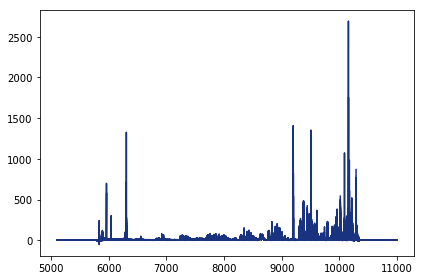

In [82]:
x = wavelength_spec1_data
y = total_flux_spec1_data
plt.plot(x,y,c =[0.1,0.2,0.5])
plt.tight_layout()
plt.show()

Access the wavelength, flux, sky, and ivar fields by creating new masked arrays.

#### Wavelength

In [83]:
wavelength_spec1 = spec1_sky['wavelength']

In [84]:
wavelength_spec1.shape

(47, 4128)

Total number of data points if all are valid.

In [85]:
47 * 4128

194016

Count the number of non-masked elements along rows (fibers).

In [86]:
wavelength_spec1.count(axis=1)

array([4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128])

Total number of valid elements in the flux  masked array.

In [87]:
wavelength_spec1.count(axis=1).sum()

194016

#### FLux

In [88]:
flux_spec1 = spec1_sky['flux']

In [89]:
flux_spec1.shape

(47, 4128)

In [90]:
flux_spec1.count(axis=1)

array([2224, 2243, 2203, 2159, 2220, 2248, 2186, 2195, 2172, 2184, 2160,
       2211, 2160, 2189, 2190, 2187, 2189, 2213, 2195, 2201, 2159, 2181,
       2199, 2177, 2182, 2152, 2161, 2180, 2183, 2150, 2207, 2169, 2175,
       2181, 2180, 2129, 2170, 2162, 2175, 2182, 2178, 2175, 2200, 2182,
       2237, 2189, 2212])

In [91]:
flux_spec1.count(axis=1).sum()

102756

#### Sky

In [92]:
sky_spec1 = spec1_sky['sky']

In [93]:
sky_spec1.count(axis=1)

array([2224, 2243, 2203, 2159, 2220, 2248, 2186, 2195, 2172, 2184, 2160,
       2211, 2160, 2189, 2190, 2187, 2189, 2213, 2195, 2201, 2159, 2181,
       2199, 2177, 2182, 2152, 2161, 2180, 2183, 2150, 2207, 2169, 2175,
       2181, 2180, 2129, 2170, 2162, 2175, 2182, 2178, 2175, 2200, 2182,
       2237, 2189, 2212])

In [94]:
sky_spec1.count(axis=1).sum()

102756

#### Sky + Flux

In [95]:
total_flux_spec1 = np.ma.array(flux_spec1.data+sky_spec1.data, mask=list(map(and_,flux_spec1.mask, sky_spec1.mask)))

In [96]:
# total_flux_a = flux_a + sky_a
# Is it a correct operation to obtain the sum of two masked numpy array?

In [97]:
total_flux_spec1.shape

(47, 4128)

In [98]:
total_flux_spec1.count(axis=1)

array([2224, 2243, 2203, 2159, 2220, 2248, 2186, 2195, 2172, 2184, 2160,
       2211, 2160, 2189, 2190, 2187, 2189, 2213, 2195, 2201, 2159, 2181,
       2199, 2177, 2182, 2152, 2161, 2180, 2183, 2150, 2207, 2169, 2175,
       2181, 2180, 2129, 2170, 2162, 2175, 2182, 2178, 2175, 2200, 2182,
       2237, 2189, 2212])

Check the total number of valid data in total_flux.

In [99]:
len(total_flux_spec1.compressed())

102756

#### Inverse Variance

Inverse Variance is used as weights to computed the weighted average of total flux for sky fibers.

In [100]:
ivar_spec1 = spec1_sky['ivar']

In [101]:
type(ivar_spec1)

numpy.ma.core.MaskedArray

In [102]:
ivar_spec1.shape

(47, 4128)

Check number of valid data in the inverse variance masked array.

In [103]:
ivar_spec1.count(axis=1).sum()

102756

Fill in the invalid inverse variance data with value 0.

In [104]:
weights_by_ivar = ma.filled(ivar_spec1, fill_value=0)

In [105]:
type(weights_by_ivar)

numpy.ndarray

In [106]:
weights_by_ivar.shape

(47, 4128)

##### Simple Average
Average of total_flux among 47 sky fibers without no weights.

In [107]:
simple_average = ma.average(total_flux_spec1, axis=0, returned=False)

In [108]:
type(simple_average)

numpy.ma.core.MaskedArray

In [109]:
simple_average_flux1 = simple_average.data

Wavelegnth from the first sky fiber (fiber no.14) is taken as the standard wavelength scale to plot the total_flux here.

In [111]:
wavelength_fiber14 = wavelength_spec1[0]

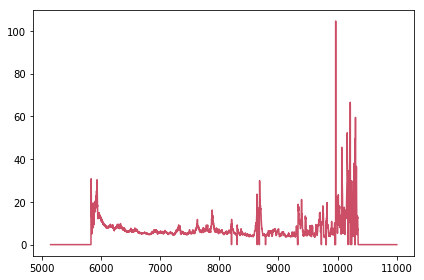

In [112]:
x = wavelength_fiber14
y = simple_average_flux1
plt.plot(x,y,c =[0.8,0.3,0.4])
plt.tight_layout()
plt.show()

#### Weighted Average
Average of total_flux of 47 sky fibers in spectrograph 1 weighted by inverse variance.

In [113]:
weighted_average = ma.average(total_flux_spec1,axis=0, weights = weights_by_ivar, returned= False)

In [114]:
type(weighted_average)

numpy.ma.core.MaskedArray

In [115]:
average_sky_flux1 = weighted_average.data

Wavelegnth from the first sky fiber (fiber no.14) is taken as the standard wavelength scale to plot the total_flux here.

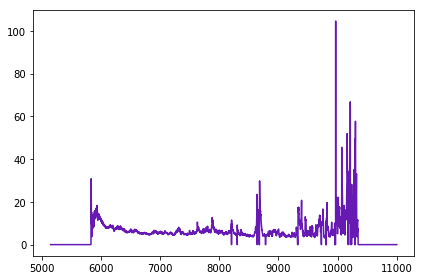

In [117]:
x = wavelength_fiber14
y = average_sky_flux1
plt.plot(x,y,c =[0.4,0.1,0.7])
plt.tight_layout()
plt.show()

### Exposure[0], Spectrograph 2, Fiber 501-1000

Locate and download the file of a single science exposure for spectrogtaph 2. The exposure file to return is set to 'spCFrame'.

In [118]:
exp0_spec2_path = combined_plan.get_exposure_name(sequence_number=0,band='red',fiber = 501,ftype='spCFrame')

In [119]:
exp0_spec2_path

'/sas/dr12/boss/spectro/redux/v5_7_0/4042/spCFrame-r2-00127588.fits'

In [120]:
exp0_spec2_file = mirror.get(exp0_spec2_path)

In [121]:
exp0_spec2_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/4042/spCFrame-r2-00127588.fits'

#### Frame file of exposure[0] of spectrograph 2

Frame file containing single exposure 0 of spectrograph 2 (half plate).

In [122]:
expo0_spec2_frame = plate.FrameFile(exp0_spec2_file, index=2, calibrated = True)

In [123]:
# expo0_spec2_frame
print("plate_number:",expo0_spec2_frame.plate,
'camera:',expo0_spec2_frame.camera,
'exposure_id:',expo0_spec2_frame.exposure_id)
# expo0_spec2_frame.header

plate_number: 4042 camera: r2 exposure_id: 127588


#### Get valid data for the 50 sky fibers in Spectrograph 2.

In [126]:
spec2_sky = expo0_spec2_frame.get_valid_data(fibers = sky_fibers2, pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [127]:
# spec2_sky

In [128]:
spec2_sky.shape

(50, 4128)

In [129]:
type(spec2_sky)

numpy.ma.core.MaskedArray

In [130]:
wavelength_spec2_data = spec2_sky.data['wavelength']

In [131]:
flux_spec2_data = spec2_sky.data['flux']

In [132]:
sky_spec2_data = spec2_sky.data['sky']

In [133]:
total_flux_spec2_data = flux_spec2_data + sky_spec2_data

A plot for the total flux among the 50 sky fibers in spectrograph 2.

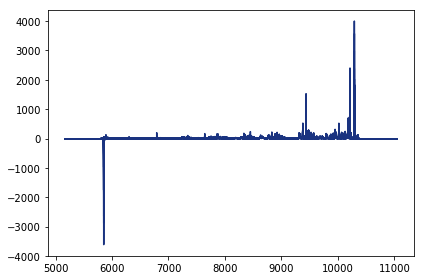

In [134]:
x = wavelength_spec2_data
y = total_flux_spec2_data
plt.plot(x,y,c=[0.1,0.2,0.5])
plt.tight_layout()
plt.show()

Access the wavelength, flux, sky, and ivar fields by creating new masked arrays.

#### Wavelength

In [135]:
wavelength_spec2 = spec2_sky['wavelength']

In [136]:
wavelength_spec2.shape

(50, 4128)

Total number of data points if all are valid.

In [138]:
50 * 4128

206400

Count the number of non-masked elements along rows (fibers).

In [139]:
wavelength_spec2.count(axis=1)

array([4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128])

Total number of valid elements in the flux  masked array.

In [140]:
wavelength_spec2.count(axis=1).sum()

206400

#### FLux

In [141]:
flux_spec2 = spec2_sky['flux']

In [142]:
flux_spec2.shape

(50, 4128)

In [143]:
flux_spec2.count(axis=1)

array([2300, 2254, 2296, 2288, 2314, 2294, 2279, 2268, 2291, 2311, 2269,
       2276, 2302, 2232, 2306, 2278, 2242, 2241, 2233, 2268, 2261, 2237,
       2245, 2250, 2240, 2219, 2244, 2278, 2268, 2261, 2272, 2278, 2223,
       2221, 2278, 2271, 2274, 2261, 2230, 2247, 2280, 2296, 2267, 2265,
       2254, 2244, 2221, 2297, 2229, 2248])

In [144]:
flux_spec2.count(axis=1).sum()

113201

#### Sky

In [145]:
sky_spec2 = spec2_sky['sky']

In [146]:
sky_spec2.count(axis=1)

array([2300, 2254, 2296, 2288, 2314, 2294, 2279, 2268, 2291, 2311, 2269,
       2276, 2302, 2232, 2306, 2278, 2242, 2241, 2233, 2268, 2261, 2237,
       2245, 2250, 2240, 2219, 2244, 2278, 2268, 2261, 2272, 2278, 2223,
       2221, 2278, 2271, 2274, 2261, 2230, 2247, 2280, 2296, 2267, 2265,
       2254, 2244, 2221, 2297, 2229, 2248])

In [147]:
sky_spec2.count(axis=1).sum()

113201

#### Sky + Flux

In [148]:
total_flux_spec2 = np.ma.array(flux_spec2.data+sky_spec2.data, mask=list(map(and_,flux_spec2.mask, sky_spec2.mask)))

In [149]:
total_flux_spec2.shape

(50, 4128)

In [150]:
total_flux_spec2.count(axis=1)

array([2300, 2254, 2296, 2288, 2314, 2294, 2279, 2268, 2291, 2311, 2269,
       2276, 2302, 2232, 2306, 2278, 2242, 2241, 2233, 2268, 2261, 2237,
       2245, 2250, 2240, 2219, 2244, 2278, 2268, 2261, 2272, 2278, 2223,
       2221, 2278, 2271, 2274, 2261, 2230, 2247, 2280, 2296, 2267, 2265,
       2254, 2244, 2221, 2297, 2229, 2248])

Check the total number of valid data in total_flux.

In [151]:
len(total_flux_spec2.compressed())

113201

#### Inverse Variance

Inverse Variance is used as weights to computed the weighted average of total flux for sky fibers.

In [152]:
ivar_spec2 = spec2_sky['ivar']

In [153]:
type(ivar_spec2)

numpy.ma.core.MaskedArray

In [154]:
ivar_spec2.shape

(50, 4128)

Check number of valid data in the inverse variance masked array.

In [155]:
ivar_spec2.count(axis=1).sum()

113201

Fill in the invalid inverse variance data with value 0.

In [156]:
weights_by_ivar2 = ma.filled(ivar_spec2, fill_value=0)

In [157]:
type(weights_by_ivar2)

numpy.ndarray

In [158]:
weights_by_ivar2.shape

(50, 4128)

##### Simple Average
Average of total_flux among 50 sky fibers without no weights.

In [159]:
simple_average2 = ma.average(total_flux_spec2, axis=0, returned=False)

In [160]:
type(simple_average2)

numpy.ma.core.MaskedArray

In [161]:
simple_average_flux2 = simple_average2.data

Wavelegnth from the first sky fiber (fiber no.14) is taken as the standard wavelength scale to plot the total_flux here.

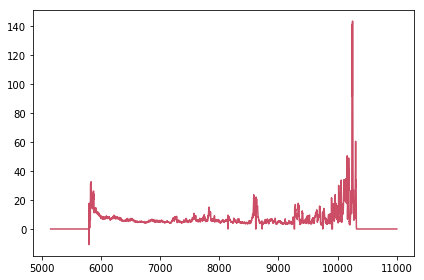

In [162]:
x = wavelength_fiber14
y = simple_average_flux2
plt.plot(x,y,c =[0.8,0.3,0.4])
plt.tight_layout()
plt.show()

#### Weighted Average
Average of total_flux of 50 sky fibers in spectrograph 2 weighted by inverse variance.

In [163]:
weighted_average2 = ma.average(total_flux_spec2,axis=0, weights = weights_by_ivar2, returned= False)

In [164]:
type(weighted_average2)

numpy.ma.core.MaskedArray

In [165]:
average_sky_flux2 = weighted_average2.data

Wavelegnth from the first sky fiber (fiber no.14) is taken as the standard wavelength scale to plot the total_flux here.

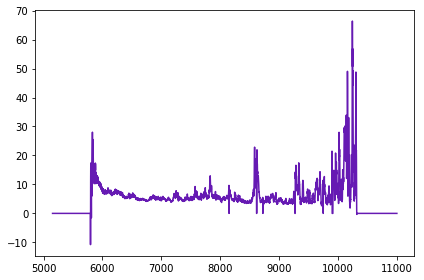

In [168]:
x = wavelength_fiber14
y = average_sky_flux2
plt.plot(x,y,c =[0.4,0.1,0.7])
plt.tight_layout()
plt.show()